If you have Anaconda installed already, try typing into your terminal (On a Mac, located under Applications - Utilities - Terminal. On Windows, located under Programs - Anaconda Prompt): 

conda install -c conda-forge selenium

Then download the latest version of chromedriver directly from:

https://sites.google.com/a/chromium.org/chromedriver/downloads

Make sure that you download the same version as your Chrome browser. To find out which version you you have, click on Chrome - About Chrome.

2.Unzip it and move it into your Desktop folder.

3.IF YOU HAVE A MAC: replace ```chromedriver = "/Users/shareshianl/Desktop/chromedriver"``` with whatever your username is in the cell below. (To figure out where your chromedriver is located, you can type "where chromedriver" in the terminal.)

IF YOU HAVE WINDOWS: You will need double backslashes. Replace ```chromedriver = "/Users/shareshianl/Desktop/chromedriver"``` with something like chromedriver = "C:\\\Users\\\{Your_user_name}\\\Desktop\\\chromedriver" below. (Example: chromedriver = "C:\\\Users\\\shareshian\\\Desktop\\\chromedriver")

In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

chromedriver = "/Users/shareshianl/Desktop/chromedriver"
driver = webdriver.Chrome(chromedriver)
driver.get('http://www.boxofficemojo.com')
driver.close()

1.We are going to explore the top 100 movie releases of 2017 using the dataset here:

http://www.boxofficemojo.com/yearly/chart/?yr=2017&p=.htm

First, read in the 100 movie table using pd.read_html.

In [4]:
table = pd.read_html('http://www.boxofficemojo.com/yearly/chart/?yr=2017&p=.htm')[2]

2.Only rows 6 through 106 and the odd columns 1,3,5 and 7 contain valuable info that we will use. Save this reduced table to a dataframe called movies. Then reset the index. Be sure the changes save!

In [5]:
movies = table.iloc[6:106,[1,3,5,7]]
movies = movies.reset_index(drop=True)
movies.head()

,1,3,5,7
0,Star Wars: The Last Jedi,"$620,181,382","$220,009,584",12/15
1,Beauty and the Beast (2017),"$504,014,165","$174,750,616",3/17
2,Wonder Woman,"$412,563,408","$103,251,471",6/2
3,Jumanji: Welcome to the Jungle,"$404,515,480","$36,169,328",12/20
4,Guardians of the Galaxy Vol. 2,"$389,813,101","$146,510,104",5/5


3.Rename the columns to be movie, total gross, opening gross, open date.

In [6]:
movies = movies.rename(index=str, columns={1: 'movie',
                                           3: 'total gross',
                                           5: 'open gross',
                                           7: 'open date'})
movies.shape

(100, 4)

4.You can strip the dollar signs and commas from the total gross using list comprehensions. Study the code carefully below and run it:

In [7]:
movies['total gross'] = [x.strip('$') for x in movies['total gross']]
movies['total gross'] = [x.replace(',', '') for x in movies['total gross']]

5.Strip the dollar signs from the open gross column.

In [8]:
movies['open gross'] = [x.strip('$') for x in movies['open gross']]
movies['open gross'] = [x.replace(',','') for x in movies['open gross']]
movies.head()

,movie,total gross,open gross,open date
0,Star Wars: The Last Jedi,620181382,220009584,12/15
1,Beauty and the Beast (2017),504014165,174750616,3/17
2,Wonder Woman,412563408,103251471,6/2
3,Jumanji: Welcome to the Jungle,404515480,36169328,12/20
4,Guardians of the Galaxy Vol. 2,389813101,146510104,5/5


6.Plot total gross on the x axis and open gross on the y-axis.

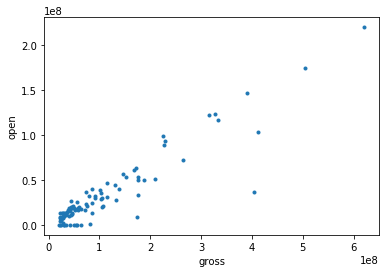

In [9]:
plt.plot(movies['total gross'],movies['open gross'],'.')
plt.xlabel('gross')
plt.ylabel('open')

7.Change the gross columns to integer data types.

In [10]:
movies['open gross'] = movies['open gross'].astype(int)
movies['total gross'] = movies['total gross'].astype(int)

8.Create another column called ratio that is given by the opening gross divided by the total gross. Do it in one line.

In [11]:
movies['ratio'] =  movies['open gross']/movies['total gross']

9.Sort the ratio from smallest to largest to find the biggest "sleeper" hit (meaning, the movie that didn't make that much in its opening weekend but made a lot of money later.)

In [12]:
movies.sort_values(by = 'ratio')

,movie,total gross,open gross,open date,ratio
83,Hostiles,29819114,22849,12/22,0.000766
45,The Shape of Water,63859435,166564,12/1,0.002608
49,Darkest Hour,56468410,175006,11/22,0.003099
73,Wind River,33800859,161558,8/4,0.004780
51,"Three Billboards Outside Ebbing, Missouri",54513740,322168,11/10,0.005910
38,The Post,81903458,526011,12/22,0.006422
95,Victoria and Abdul,22245070,158845,9/22,0.007141
55,Lady Bird,48958273,364437,11/3,0.007444
82,"I, Tonya",30014539,264155,12/8,0.008801
64,The Big Sick,42873127,421577,6/23,0.009833


10.Plot a histogram of the ratios. Make the rwidth by 0.9 and make the bins start at 0 and end at 1 in increments of 0.1. Label the axes.

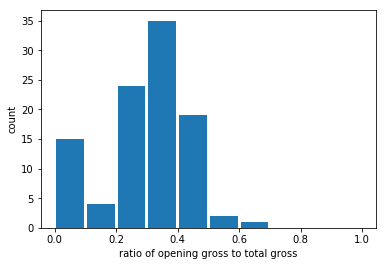

In [13]:
plt.hist(movies['ratio'],rwidth=0.9, bins=np.arange(0,1.1,.1))
plt.xlabel('ratio of opening gross to total gross')
plt.ylabel('count')

11.Update the open date column to include the year 2017. For example, the string 06/22 should become the string 06/22/2017. You can do this in one line.

In [14]:
movies['open date'] = movies['open date'] + '/2017'

12.Use the built-in pandas datetime capability to convert the opening date column to a datetime object.

In [15]:
movies['open date'] = pd.to_datetime(movies['open date'], format = '%m/%d/%Y')

13.Make another column called "open month" that just includes the opening month of the opening date. Use pandas datetime to do this in one line. Hint - google the following search term:

python pandas extract year from datetime


In [16]:
movies['open month'] = movies['open date'].dt.month

14.Create a frequency table to find the most popular month for blockbuster hits.

In [17]:
movies['open month'].value_counts()

12    13
6     12
11    11
10     8
8      8
3      8
9      7
7      7
5      7
2      7
1      7
4      5
Name: open month, dtype: int64

15.Create a histogram of the months. Make the rwidth be 0.9 and the bins start at 0.5 and end at 12.5 in increments of 1.

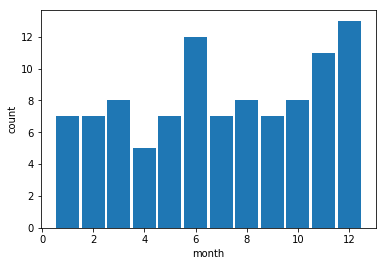

In [18]:
plt.hist(movies['open month'],rwidth = 0.9, bins=np.arange(0.5,13.5,1))
plt.xlabel('month')
plt.ylabel('count')

16.Okay. Now we're going to add director info to our dataframe, which wasn't included on the website up above. Create an empty string column for the director in your dataframe called "director".

In [19]:
movies['director'] = ''

17.Go to the website http://www.boxofficemojo.com/yearly/chart/?yr=2017&p=.htm . Find the XPath of the first movie name listed. Copy and paste the XPath link below:

In [20]:
# //*[@id="body"]/table[3]/tbody/tr/td[1]/table/tbody/tr[2]/td/table/tbody/tr[2]/td[2]/b/font/a

18.Use Selenium to click on the movie name link and then print the director's name below.

In [21]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chromedriver = "/Users/shareshianl/Desktop/chromedriver"
driver = webdriver.Chrome(chromedriver)

url = 'http://www.boxofficemojo.com/yearly/chart/?yr=2017&p=.htm'
driver.get(url)
text = '//*[@id="body"]/table[3]/tbody/tr/td[1]/table/tbody/tr[2]/td/table/tbody/tr[2]/td[2]/b/font/a'
movie = driver.find_element_by_xpath(text).click()
text = '//*[@id="body"]/table[2]/tbody/tr/td/table[2]/tbody/tr[2]/td/table/tbody/tr/td[1]/table/tbody/tr/td[2]/div/div[2]/table/tbody/tr[1]/td[2]/font/a'
director = driver.find_element_by_xpath(text)
print(director.text)
driver.close()

Rian Johnson


19.Okay, so we'll want to iterate through all of the movies in the list located at http://www.boxofficemojo.com/yearly/chart/?yr=2017&p=.htm , click on their links, and save their directors. But we may run into a problem. Find the XPath of the second movie in the list and write it below. Is it the same as the first? If not, what is different?

In [22]:
# //*[@id="body"]/table[3]/tbody/tr/td[1]/table/tbody/tr[2]/td/table/tbody/tr[2]/td[2]/b/font/a
# //*[@id="body"]/table[3]/tbody/tr/td[1]/table/tbody/tr[2]/td/table/tbody/tr[3]/td[2]/b/font/a

20.To get around this, we actually won't search by XPath, because that is too specific. Right click and then inspect the first movie in the list again. You should see:

href="/movies/?id=starwars8.htm"....

The id will change from one movie to another but all of them start out as: 

href="/movies/..."

How do we search for this part? We can type:

movie_infos = driver.find_elements_by_xpath( '//a[contains(@href, "/movies/")]')

Note: This movie list will contain all of the movie info, so you will need a loop to iterate through each piece of movie info.

Second note: You'll want to save the HREF for each movie to a list called urls. 

Hint: look back to the get_attribute command in the Unit 11 Assignment if you forget how to do this.


In [23]:
chromedriver = "/Users/shareshianl/Desktop/chromedriver"
driver = webdriver.Chrome(chromedriver)

url = "http://www.boxofficemojo.com/yearly/chart/?yr=2017&p=.htm"
driver.get(url)
movie_infos = driver.find_elements_by_xpath( '//a[contains(@href, "/movies/")]')
movie_urls = []
for i, movie_info in enumerate(movie_infos):
    movie_urls.append(movie_info.get_attribute('href'))
    
driver.close()

21.The first url found is not actually the first movie in the list. Delete this first unnecessary url from the list.

In [24]:
del movie_urls[0]

22.Use Selenium to go to visit the first URL in your updated list of urls and print the director that you find from it.

In [25]:
chromedriver = "/Users/shareshianl/Desktop/chromedriver"
driver = webdriver.Chrome(chromedriver)

driver.get(movie_urls[0])
text = '//*[@id="body"]/table[2]/tbody/tr/td/table[2]/tbody/tr[2]/td/table/tbody/tr/td[1]/table/tbody/tr/td[2]/div/div[2]/table/tbody/tr[1]/td[2]/font/a'
director = driver.find_element_by_xpath(text).text
driver.close()
print(director)

Rian Johnson


23.Iterate through all of the urls in your list, finding each director. As you iterate through the list, immediately update your dataframe to include the director in the director column. 

First hint: Remember you can update the entry by typing something like:

movies['director'][i] = director name

Second hint: One of your urls might mess up. Insert a try/except in order to try to get the director name, but if it fails, print the movie and the url that gave you the error.

Third hint: you'll notice that some of the XPaths end in "td[2]/font/a" and some end in just "td[2]/font". MAKE SURE YOUR XPATH SEARCH TERM ENDS IN SIMPLY "td[2]/font" or else you'll miss a lot of the movies.

In [27]:
import time

for i in range(len(movie_urls)):
        try:
            chromedriver = "/Users/shareshianl/Desktop/chromedriver"
            driver = webdriver.Chrome(chromedriver)
            url = movie_urls[i]
            driver.get(url)
            text = '//*[@id="body"]/table[2]/tbody/tr/td/table[2]/tbody/tr[2]/td/table/tbody/tr/td[1]/table/tbody/tr/td[2]/div/div[2]/table/tbody/tr[1]/td[2]/font'
            director = driver.find_element_by_xpath(text).text
            movies['director'][i] = director
            print(i)
            time.sleep(5)
        except:
            print('BAD', i, movies['movie'][i], url)
        driver.close()
movies.head()

/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


5


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


6


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


7


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


8


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


9


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


10


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


11


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


12


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


13


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


14


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


15


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


16


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


17


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


18


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


19


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


20


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


21


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


22


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


23


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


24


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


25


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


26


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


27


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


28


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


29


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


30


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


31


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


32


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


33


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


34


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


35


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


36


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


37


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


38


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


39


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


40


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


41


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


42


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


43


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


44


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


45


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


46


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


47


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


48


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


49


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


50


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


51


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


52


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


53


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


54


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


55


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


56


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


57


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


58


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


59


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


60


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


61


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


62


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


63


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


64


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


65


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


66


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


67


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


68


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


69


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


70


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


71


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


72


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


73


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


74


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


75


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


76


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


77


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


78


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


79


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


80


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


81


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


82


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


83


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


84


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


85
BAD 86 Rings https://www.boxofficemojo.com/movies/?id=rings.htm


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


87


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


88


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


89


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


90


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


91


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


92


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


93


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


94


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


95


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


96


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


97


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


98


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


99


,movie,total gross,open gross,open date,ratio,open month,director
0,Star Wars: The Last Jedi,620181382,220009584,2017-12-15,0.354750,12,Rian Johnson
1,Beauty and the Beast (2017),504014165,174750616,2017-03-17,0.346718,3,Bill Condon
2,Wonder Woman,412563408,103251471,2017-06-02,0.250268,6,Patty Jenkins
3,Jumanji: Welcome to the Jungle,404515480,36169328,2017-12-20,0.089414,12,Jake Kasdan
4,Guardians of the Galaxy Vol. 2,389813101,146510104,2017-05-05,0.375847,5,James Gunn


24.What is the url that messes up? Go to its link to investigate why. Describe the error below.

In [29]:
#director missing
print(movie_urls[19])

https://www.boxofficemojo.com/movies/?id=legendary2016.htm


25.You definitely won't want to run the above code again because it takes so long. Pickle your dataframe so you can work with it later. If you forget how to pickle, go to the bottom of the Unit 8 Assignment.

In [30]:
movies.to_pickle('movies.pkl')

25.Read the dataframe back in (and call it movies again) from the pickle file to make sure it saved correctly.

In [3]:
import pandas as pd
movies = pd.read_pickle('movies.pkl')
movies.head()

,movie,total gross,open gross,open date,ratio,open month,director
0,Star Wars: The Last Jedi,620181382,220009584,2017-12-15,0.354750,12,Rian Johnson
1,Beauty and the Beast (2017),504014165,174750616,2017-03-17,0.346718,3,Bill Condon
2,Wonder Woman,412563408,103251471,2017-06-02,0.250268,6,Patty Jenkins
3,Jumanji: Welcome to the Jungle,404515480,36169328,2017-12-20,0.089414,12,Jake Kasdan
4,Guardians of the Galaxy Vol. 2,389813101,146510104,2017-05-05,0.375847,5,James Gunn


26.Drop the movies from the dataframe that didn't have a director listed. (Note: You won't be able to use dropna since technically none of the entries are null since you initialized them all to be an empty string ''. However, you can exclude those entries from the dataframe using an expression that involves a "!=" symbol.


In [32]:
movies = movies[movies['director']!='']
movies.shape

(99, 7)

27.Re-pickle your dataframe so that your changes are saved.

In [33]:
movies.to_pickle('movies.pkl')

28.Use value_counts in decending order on the director dataframe to view which director had the most top 100 movies in 2017.

In [34]:
movies.director.value_counts(ascending = False)

Ridley Scott                                                                                                                                                                                  2
Hugh Jackman\nMichelle Williams\nZac Efron\nZendaya\nRebecca Ferguson                                                                                                                         1
Benny Boon                                                                                                                                                                                    1
Chad Stahelski                                                                                                                                                                                1
Aaron Sorkin                                                                                                                                                                                  1
Elle Fanning (Voice)\nKate McKinnon (Voi

29.Print all of the movie info for the movies that this director made.

In [35]:
movies[movies['director']=='Ridley Scott']

,movie,total gross,open gross,open date,ratio,open month,director
41,Alien: Covenant,74262031,36160621,2017-05-19,0.486933,5,Ridley Scott
91,All the Money in the World,25113707,5584684,2017-12-25,0.222376,12,Ridley Scott
